In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

rcParams['figure.figsize'] = (13, 8)

import os

In [8]:
eur = pd.read_csv('EURUSD_.csv')
eur = eur[:100]
eur['Local time'] = pd.to_datetime(eur['Local time'])
eur = eur.rename(columns={'Local time': 'time'})

In [9]:
eur.head()

,time,Open,High,Low,Close,Volume
0,2018-04-05 17:00:00,1.16835,1.17148,1.16753,1.16965,18831.3906
1,2018-04-05 18:00:00,1.16964,1.17179,1.16842,1.17097,17289.9707
2,2018-04-05 19:00:00,1.17097,1.17338,1.17077,1.17294,18315.7598
3,2018-04-05 20:00:00,1.17294,1.17372,1.17200,1.17216,15757.2100
4,2018-04-05 21:00:00,1.17217,1.17379,1.17201,1.17373,12511.9199


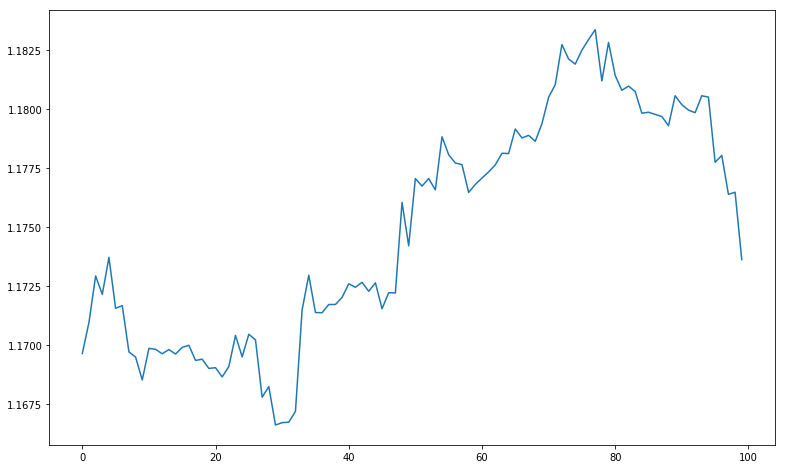

In [10]:
plt.plot(eur['Close'])

In [11]:
# Make simple MP without factoring in volume.

mp_df = []

day = 0

for _ in eur['time']:
    
    # Hour within day
    if _.day == day:
        
        current_i = eur.loc[eur['time'] == _].index.values[0]
        
        hmin = eur.loc[eur['time'] == _, ['Open', 'High', 'Low', 'Close']].values[0].min()
        hmax = eur.loc[eur['time'] == _, ['Open', 'High', 'Low', 'Close']].values[0].max()
        daymin = eur.iloc[day_i:current_i, 1:5].min().min()
        daymax = eur.iloc[day_i:current_i, 1:5].max().max()
        
        mp_df.append([_, hmin, hmax, daymin, daymax])
        
    # New day
    if _.day != day:
        
        day = _.day
        day_i = eur.loc[eur['time'] == _].index.values[0] # Gets the index
      
        hmin = eur.loc[eur['time'] == _, ['Open', 'High', 'Low', 'Close']].values[0].min()
        hmax = eur.loc[eur['time'] == _, ['Open', 'High', 'Low', 'Close']].values[0].max()
        daymin = hmin
        daymax = hmax
        
        mp_df.append([_, hmin, hmax, daymin, daymax])
    
mp_df = pd.DataFrame(mp_df, columns=['time', 'hmin', 'hmax', 'daymin', 'daymax'])

In [12]:
mp_df_2 = []
mp_df_3 = []

day = 0

for _ in mp_df['time']:
    
    if _.day == day:
        hr_min = round(mp_df.loc[mp_df['time'] == _, 'hmin'].values[0], 4)
        hr_max = round(mp_df.loc[mp_df['time'] == _, 'hmax'].values[0], 4)
        mp_df_2.extend([x for x in np.arange(hr_min, hr_max, 0.0001)])
        
    if _.day != day:
        mp_df_3.append(mp_df_2)
        mp_df_2 = []
        day = _.day
        hr_min = round(mp_df.loc[mp_df['time'] == _, 'hmin'].values[0], 4)
        hr_max = round(mp_df.loc[mp_df['time'] == _, 'hmax'].values[0], 4)
        mp_df_2.extend([x for x in np.arange(hr_min, hr_max, 0.0001)])
        
mp_df_3 = pd.DataFrame(mp_df_3)

In [15]:
mp_df_3

,0,1,2,3,4,5,6,7,8,9,...,273,274,275,276,277,278,279,280,281,282
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.1675,1.1676,1.1677,1.1678,1.1679,1.1680,1.1681,1.1682,1.1683,1.1684,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.1692,1.1693,1.1694,1.1695,1.1696,1.1697,1.1698,1.1699,1.1700,1.1701,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.1686,1.1687,1.1688,1.1689,1.1690,1.1691,1.1692,1.1693,1.1694,1.1695,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.1652,1.1653,1.1654,1.1655,1.1656,1.1657,1.1658,1.1659,1.1660,1.1661,...,1.1743,1.1744,1.1745,1.1746,1.1747,1.1748,1.1749,1.175,1.1751,1.1752
5,1.1715,1.1716,1.1717,1.1718,1.1719,1.1720,1.1721,1.1722,1.1723,1.1724,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.1773,1.1774,1.1775,1.1776,1.1777,1.1778,1.1779,1.1780,1.1781,1.1782,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.1808,1.1809,1.1810,1.1811,1.1812,1.1813,1.1814,1.1815,1.1816,1.1817,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.1806,1.1807,1.1808,1.1809,1.1810,1.1811,1.1812,1.1813,1.1814,1.1815,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/Users/sam/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sam/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sam/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sam/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sam/anaconda3/lib/python3.6/site-pack

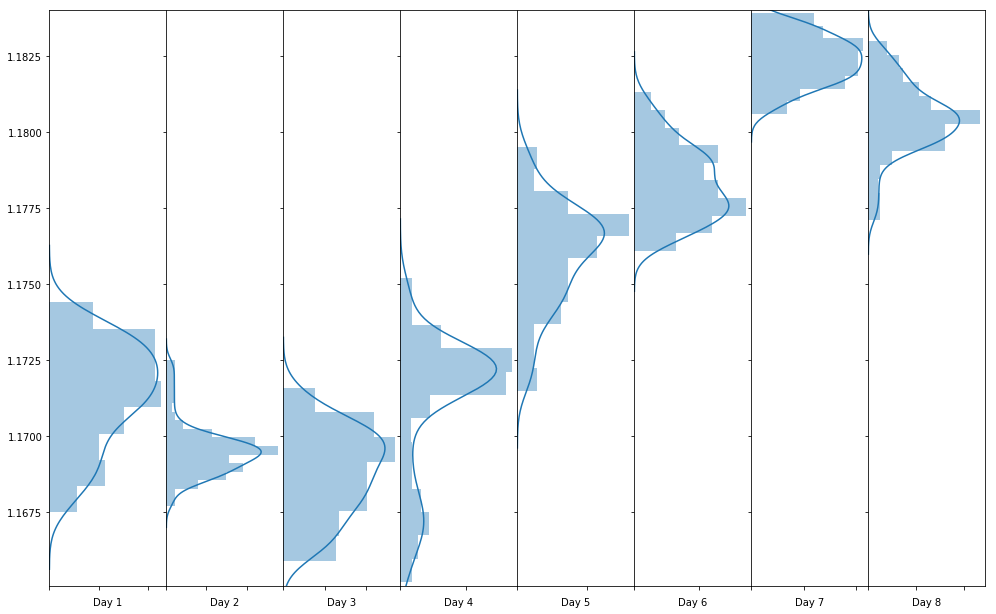

In [17]:
# Plain MP.

days = len(mp_df_3.index) - 1

ymax = mp_df_3.iloc[1:days+1].max().max() + (mp_df_3.iloc[1:days+1].max().max()*.0001)
ymin = mp_df_3.iloc[1:days+1].min().min() - (mp_df_3.iloc[1:days+1].min().min()*.0001)

fig = plt.figure()

for _ in range(1, days+1):
    
    if _ > 1:
        ax_ = fig.add_axes([(_/days)-(1/days), 0, (1/days), 1],
                           xticklabels=[],
                           yticklabels=[],
                           ylim=(ymin, ymax))
        ax_.set(xlabel='Day '+str(_))                            # Haven't put in exact dates yet
        
    else:
        ax_ = fig.add_axes([(_/days)-(1/days), 0, (1/days), 1],
                           xticklabels=[],
                           ylim=(ymin, ymax))
        ax_.set(xlabel='Day '+str(_))
    
    sns.distplot(mp_df_3.iloc[_].dropna().values, vertical=True, ax=ax_);

/Users/sam/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sam/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sam/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sam/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sam/anaconda3/lib/python3.6/site-pack

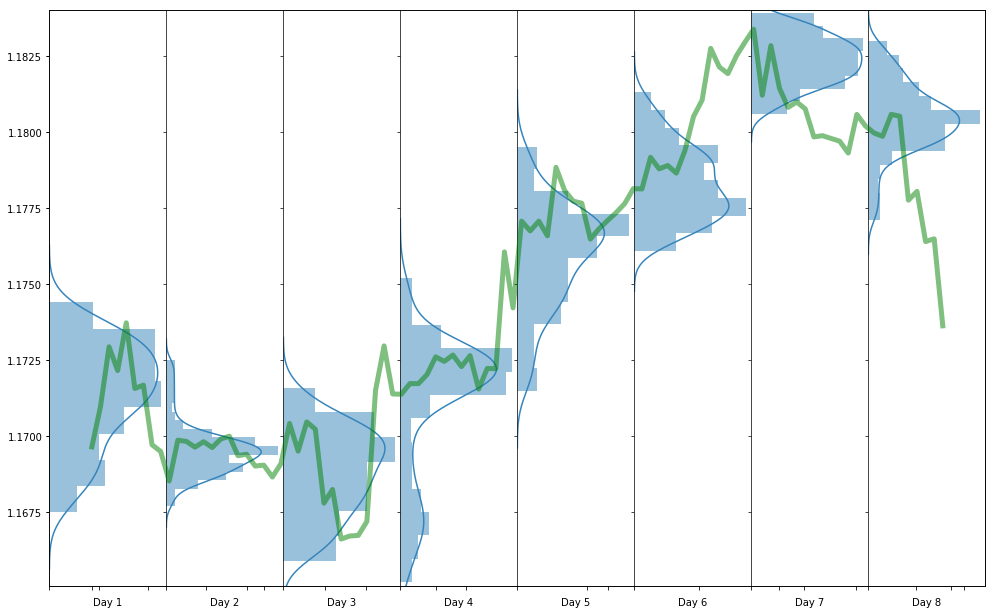

In [18]:
# Adding in the close.

days = len(mp_df_3) - 1

ymax = mp_df_3.iloc[1:days+1].max().max() + (mp_df_3.iloc[1:days+1].max().max()*.0001)
ymin = mp_df_3.iloc[1:days+1].min().min() - (mp_df_3.iloc[1:days+1].min().min()*.0001)

fig = plt.figure()

for _ in range(1, days+1):
    
    if _ > 1:
        ax_ = fig.add_axes([(_/days)-(1/days), 0, (1/days), 1],
                           xticklabels=[],
                           yticklabels=[],
                           ylim=(ymin, ymax))
        ax_.set(xlabel='Day '+str(_))                            # Haven't put in exact dates yet
        
    else:
        ax_ = fig.add_axes([(_/days)-(1/days), 0, (1/days), 1],
                           xticklabels=[],
                           ylim=(ymin, ymax))
        ax_.set(xlabel='Day '+str(_))
    
    sns.distplot(mp_df_3.iloc[_].dropna().values, vertical=True, ax=ax_, hist_kws={'alpha': .5});

ax2 = fig.add_axes([0, 0, 1, 1], ylim=(ymin, ymax), xticklabels=[],
                           yticklabels=[])
ax2.patch.set_alpha(0.1)
ax2.plot(eur['Close'], alpha=.5, lw=5, color='g')
plt.show()